# Pets Race train

In [1]:
#!pip install -q timm
import timm
from fastai.vision.all import*

In [2]:
path = untar_data(URLs.PETS)/'images'

dls = ImageDataLoaders.from_name_func('.',
    get_image_files(path), valid_pct = 0.2, seed = 42,
    label_func = RegexLabeller(pat = r'^([^/]+)_\d+'),
    item_tfms = Resize(224))

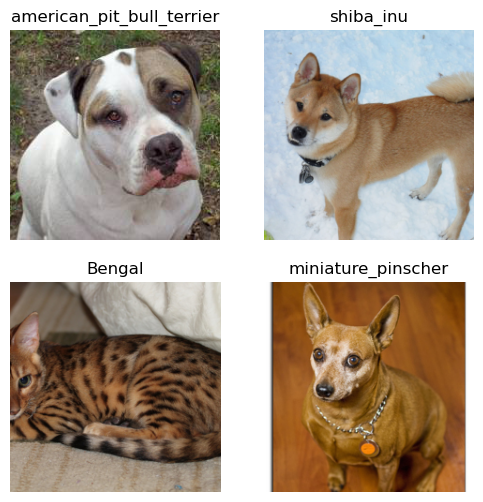

In [3]:
dls.show_batch(max_n=4)

In [4]:
learn = vision_learner(dls, resnet34, metrics = error_rate)
learn.fine_tune(5)

C:\Users\nebia\anaconda3\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\nebia\anaconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,error_rate,time
0,1.479292,0.296799,0.090663,09:01


epoch,train_loss,valid_loss,error_rate,time
0,0.440014,0.281917,0.092016,12:13
1,0.330014,0.294438,0.094046,12:31
2,0.195839,0.236121,0.066982,12:22
3,0.093584,0.210264,0.060217,12:09
4,0.056302,0.209376,0.059540,11:33


In [5]:
learn.export('model.pkl')